# Kernel herding tensorized test

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
import matplotlib.pyplot as plt
from plotools import *

## Independent bivariate random mixture

In [3]:
# Random input variable definition
# Here a random mixture
modes = [ot.Normal(0.3, 0.12), ot.Normal(0.7, 0.1)]
weight = [0.4, 1.0]
mixture = ot.Mixture(modes, weight)
normal = ot.Normal(0.6, 0.15)
distribution = ot.ComposedDistribution([mixture, normal])

In [4]:
dimension = distribution.getDimension()
size = 20
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
ker_list = [ot.MaternModel([0.1], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design, _ = kh.select_design(size)
# Tensorized kernel herding design
kht = otkd.KernelHerdingTensorized(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kht_design, _ = kh.select_design(size)

In [5]:
candidate_points_potentials = kh.compute_target_potential()
tensorized_candidate_points_potentials = kht.compute_target_potential()
potentials_error = np.abs(candidate_points_potentials - tensorized_candidate_points_potentials)

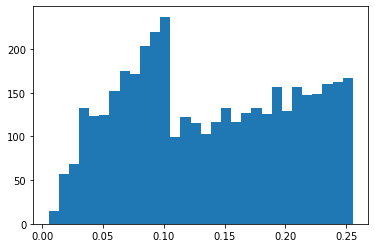

In [6]:
plt.hist(tensorized_candidate_points_potentials, bins=30);

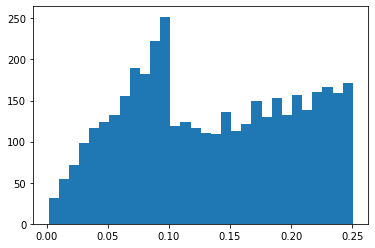

In [7]:
plt.hist(candidate_points_potentials, bins=30);

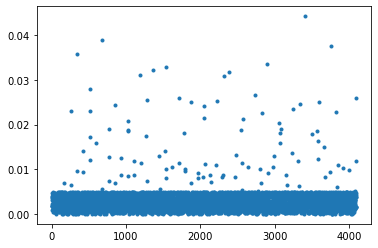

In [8]:

plt.scatter(range(len(potentials_error)), potentials_error, marker='.');